In [2]:
import pandas as pd
import numpy as np
import json
from collections import Counter, defaultdict

In [3]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [72]:
langs_america= pd.read_csv("../data/americas/languages_america.csv")

In [90]:
langs_america.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,aban1243,Abancay,NaN,dialect,South America,NaN,NaN
1,abip1241,Abipon,axb,language,South America,-29.00000,-61.0000
2,acat1240,Acatepec,NaN,dialect,North America,NaN,NaN
3,acat1239,Acatepec Me'phaa,tpx,language,North America,17.10340,-99.0602
4,acha1250,Achagua,aca,language,South America,4.38649,-72.2005


In [75]:
lang2lat=dict()
lang2long=dict()
for iso, lat, long in zip(langs_america["isocodes"], langs_america["latitude"], langs_america["longitude"]):
    lang2lat[iso]=lat
    lang2long[iso]=long
lang2lat.pop(np.nan)
lang2long.pop(np.nan)

nan

In [79]:
df_colex_langs= pd.read_csv("../data/preprocessed/colex_pron_langs.csv")

In [83]:
df_america= df_colex_langs[df_colex_langs["LANG_PRON"].isin(lang2lat)].reset_index(drop=True)

In [88]:
df_america["Latitude"] = df_america["LANG_PRON"].apply(lambda x:lang2lat[x])
df_america["Longitude"] = df_america["LANG_PRON"].apply(lambda x:lang2long[x])

In [89]:
df_america

,Unnamed: 0,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,COLEX,diff,ConcDist,Latitude,Longitude
0,89569,tsésǫʼ,NV,window#n#1,windowpane#n#1,window,windowpane,4.86,4.86,nv,nav,Navajo,window~windowpane,True,0.00,36.330000,-109.3800
1,89570,tsésǫʼ,NV,glass#n#1,window#n#1,glass,window,4.82,4.86,nv,nav,Navajo,glass~window,True,0.04,36.330000,-109.3800
2,89571,tsésǫʼ,NV,glass#n#1,windowpane#n#1,glass,windowpane,4.82,4.86,nv,nav,Navajo,glass~windowpane,True,0.04,36.330000,-109.3800
3,107706,aaqqat,KL,glove#n#2,mitten#n#1,glove,mitten,4.97,4.89,kl,kal,Kalaallisut,glove~mitten,True,0.08,69.376100,-52.8640
4,107717,lájish,NV,glove#n#2,mitten#n#1,glove,mitten,4.97,4.89,nv,nav,Navajo,glove~mitten,True,0.08,36.330000,-109.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,4148707,tsin,NV,tree#n#1,wood#n#1,tree,wood,5.00,4.85,nv,nav,Navajo,tree~wood,True,0.15,36.330000,-109.3800
375,4214702,náô’da,APW,arise#v#3,awaken#v#1,arise,awaken,3.17,3.45,apw,apw,Western Apache,arise~awaken,True,0.28,33.857400,-110.1230
376,4229348,sei,PDC,be#v#1,exist#v#1,be,exist,1.85,2.38,pdc,pdc,Pennsylvania German,be~exist,True,0.53,40.030507,-76.3211
377,4229349,sei,PDC,be#v#5,exist#v#1,be,exist,1.85,2.38,pdc,pdc,Pennsylvania German,be~exist,True,0.53,40.030507,-76.3211


In [91]:
df= df_america

In [5]:
df= pd.read_csv("../data/americas/data.csv")

In [7]:
len(df)

42

### Hypothesis 1: The concepts that are more abstract are more proable to colexifiy

The concepts that are less in concreteness is colexified in more languages/in more colexifications patterns, i.e., There are more sense_lemmas for the concept

In [92]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [93]:
counter_c1 = dict(Counter(df["C1"].tolist()).most_common())
counter_c2 = dict(Counter(df["C2"].tolist()).most_common())


In [94]:
len(counter_c1)

174

In [95]:
counter_c1.update(counter_c2)

In [96]:
len(counter_c1)

325

In [97]:
df_concept_freq = pd.DataFrame.from_dict(counter_c1, orient="index")

In [98]:
df_concept_freq.columns=["FREQ"]

In [99]:
df_concept_freq["Concept"] = df_concept_freq.index

In [100]:
df.head()

,Unnamed: 0,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,COLEX,diff,ConcDist,Latitude,Longitude
0,89569,tsésǫʼ,NV,window#n#1,windowpane#n#1,window,windowpane,4.86,4.86,nv,nav,Navajo,window~windowpane,True,0.00,36.3300,-109.380
1,89570,tsésǫʼ,NV,glass#n#1,window#n#1,glass,window,4.82,4.86,nv,nav,Navajo,glass~window,True,0.04,36.3300,-109.380
2,89571,tsésǫʼ,NV,glass#n#1,windowpane#n#1,glass,windowpane,4.82,4.86,nv,nav,Navajo,glass~windowpane,True,0.04,36.3300,-109.380
3,107706,aaqqat,KL,glove#n#2,mitten#n#1,glove,mitten,4.97,4.89,kl,kal,Kalaallisut,glove~mitten,True,0.08,69.3761,-52.864
4,107717,lájish,NV,glove#n#2,mitten#n#1,glove,mitten,4.97,4.89,nv,nav,Navajo,glove~mitten,True,0.08,36.3300,-109.380


In [101]:
concept_concreteness_1 = dict(zip(df["C1"], df["Conc.M.1"]))
concept_concreteness_2 = dict(zip(df["C2"], df["Conc.M.2"]))

In [102]:
concept_concreteness_1.update(concept_concreteness_2)

In [103]:
df_concept_freq["Concreteness"] =df_concept_freq["Concept"].apply(lambda x: concept_concreteness_1.get(x))

In [104]:
df_concept_freq

,FREQ,Concept,Concreteness
nine,36,nine,4.04
kilogram,19,kilogram,4.14
l,18,l,3.13
parable,18,parable,1.89
bluefin,18,bluefin,4.96
...,...,...,...
spy,1,spy,4.14
honeybee,1,honeybee,4.86
wood,1,wood,4.85
awaken,1,awaken,3.45


<Axes: xlabel='Concreteness', ylabel='Count'>

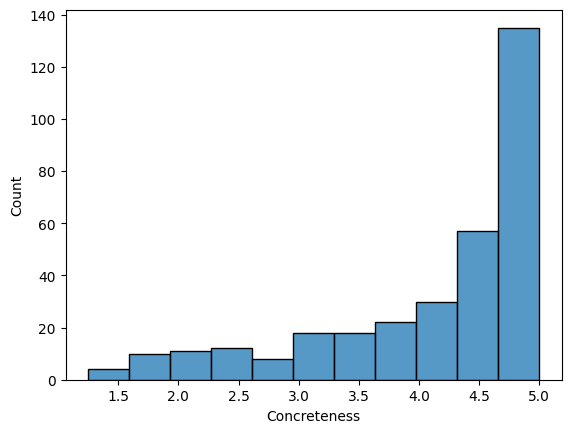

In [105]:
sns.histplot(data=df_concept_freq, x="Concreteness")

In [34]:
Y_freq = df_concept_freq["FREQ"].values.reshape(-1,1)

In [35]:
Y_freq

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [36]:
X_freq = df_concept_freq["Concreteness"].values.reshape(-1,1)

In [37]:
X_freq

array([[1.64],
       [4.14],
       [4.64],
       [3.07],
       [4.9 ],
       [4.11],
       [4.97],
       [3.32],
       [2.8 ],
       [4.68],
       [4.88],
       [2.46],
       [4.59],
       [5.  ],
       [2.6 ],
       [4.6 ],
       [4.97],
       [4.1 ],
       [4.61],
       [4.76],
       [4.25],
       [3.18],
       [4.7 ],
       [3.74],
       [2.54],
       [4.75],
       [4.93],
       [4.48],
       [4.44],
       [4.81],
       [1.6 ],
       [4.8 ],
       [4.57],
       [4.81],
       [5.  ],
       [1.85],
       [2.07],
       [5.  ],
       [4.9 ],
       [3.92],
       [4.63],
       [3.9 ],
       [4.89],
       [3.48],
       [4.38],
       [4.88],
       [4.45],
       [1.33],
       [4.71],
       [4.73],
       [4.89],
       [4.9 ],
       [4.78],
       [4.54],
       [4.93],
       [3.73],
       [3.52],
       [4.83],
       [4.5 ],
       [2.21],
       [4.97],
       [3.93],
       [3.1 ],
       [4.85],
       [2.38]])

In [38]:
linear_reg = LinearRegression()

In [39]:
linear_reg.fit(X_freq, Y_freq)

LinearRegression()

In [40]:
Y_pred = linear_reg.predict(X_freq)

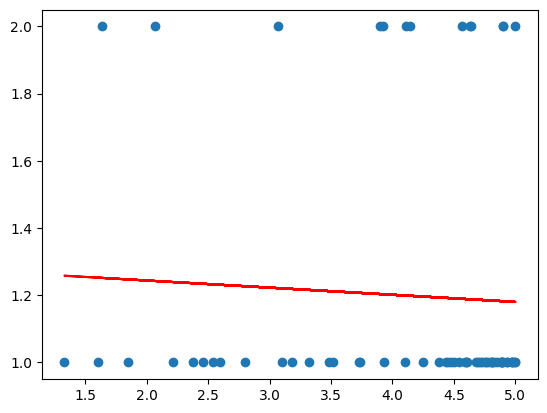

In [41]:
plt.scatter(X_freq, Y_freq)
plt.plot(X_freq, Y_pred, color='red')
plt.show()

### get the frequency by languages.

In [106]:
concept_lang_counter = defaultdict(dict)
for lang, c1, c2 in zip(df["LANG"], df["C1"], df["C2"]):
    if c1 not in concept_lang_counter:
        concept_lang_counter[c1]=defaultdict(int)
    if c2 not in concept_lang_counter:
        concept_lang_counter[c2]=defaultdict(int)
    
    concept_lang_counter[c1][lang]+=1
    concept_lang_counter[c2][lang]+=1
    

In [107]:
concept_langs = {k: len(v) for k,v in concept_lang_counter.items()}

In [108]:
df_concept_langs = pd.DataFrame.from_dict(concept_langs, orient="index")

In [109]:
df_concept_langs.columns = ["langs"]

In [110]:
df_concept_langs["Concept"] = df_concept_langs.index

In [111]:
df_concept_langs["Concreteness"] = df_concept_langs.Concept.parallel_apply(lambda x: concept_concreteness_1[x])

In [112]:
df_concept_langs

,langs,Concept,Concreteness
window,1,window,4.86
windowpane,1,windowpane,4.86
glass,1,glass,4.82
glove,2,glove,4.97
mitten,2,mitten,4.89
...,...,...,...
arise,1,arise,3.17
awaken,1,awaken,3.45
exist,1,exist,2.38
heed,1,heed,1.93


<Axes: xlabel='Concreteness', ylabel='Count'>

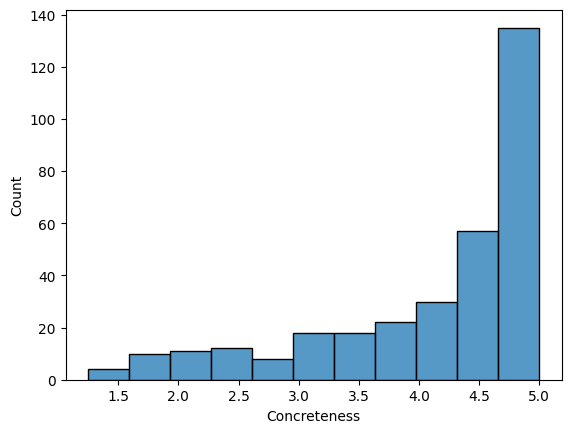

In [113]:
sns.histplot(data=df_concept_langs, x="Concreteness")

In [51]:
X = df_concept_langs["Concreteness"].values.reshape(-1,1)
Y = df_concept_langs["langs"].values.reshape(-1,1)

In [52]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

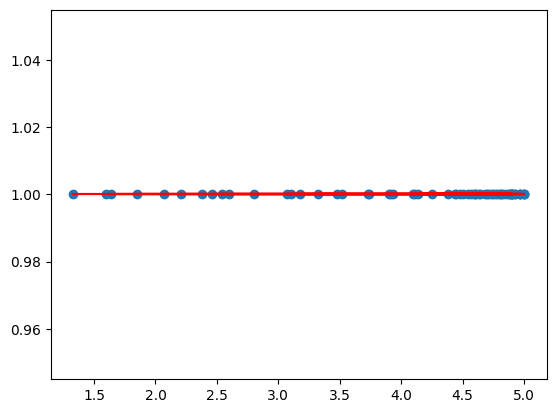

In [53]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## Hypothesis 2: The concepts closer in concreteness are more proable to colexifiy

In [114]:
df["ConcDist"]= df["Conc.M.2"]-df["Conc.M.1"]

In [116]:
df["ConcDist"]=df["ConcDist"].abs()

In [117]:
colex_con = dict(zip(df["COLEX"], df["ConcDist"]))

In [118]:
colex_lang_counter = defaultdict(dict)
for lang, colex in zip(df["LANG_PRON"], df["COLEX"]):
    if colex not in colex_lang_counter:
        colex_lang_counter[colex]=defaultdict(int)
    
    colex_lang_counter[colex][lang]+=1
    

In [119]:
langs_len= len(list(set(df["LANG_PRON"])))

In [120]:
langs_len

18

In [121]:
colex_langs = {k:len(v) for k,v in colex_lang_counter.items()}

In [122]:
df_colex_lang= pd.DataFrame.from_dict(colex_langs, orient="index")
df_colex_lang.columns = ["langs"]
df_colex_lang["COLEX"] = df_colex_lang.index
df_colex_lang["ConcDist"] = df_colex_lang["COLEX"].parallel_apply(lambda x: colex_con[x])

In [123]:
df_colex_lang

,langs,COLEX,ConcDist
window~windowpane,1,window~windowpane,0.00
glass~window,1,glass~window,0.04
glass~windowpane,1,glass~windowpane,0.04
glove~mitten,2,glove~mitten,0.08
goose~name,1,goose~name,1.31
...,...,...,...
shade~shadow,2,shade~shadow,1.16
tree~wood,1,tree~wood,0.15
arise~awaken,1,arise~awaken,0.28
be~exist,1,be~exist,0.53


<Axes: xlabel='ConcDist', ylabel='Count'>

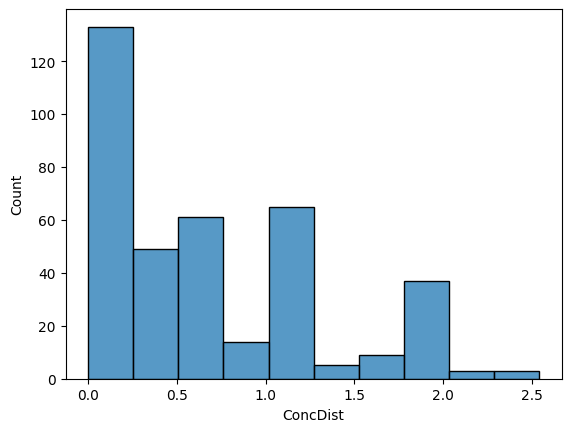

In [125]:
sns.histplot(data= df, x="ConcDist")

<Axes: xlabel='ConcDist', ylabel='Count'>

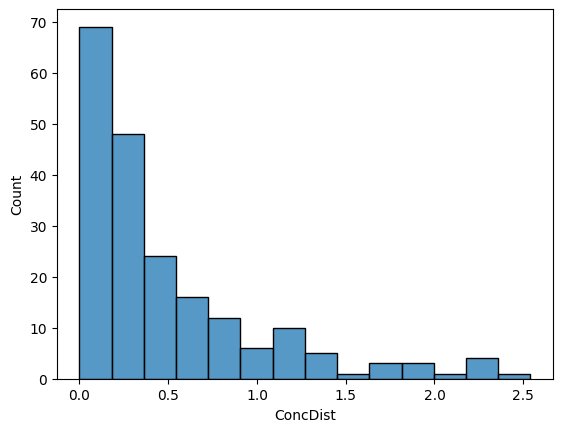

In [126]:
sns.histplot(data= df_colex_lang, x="ConcDist")